In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from sympy import integrate
from scipy.integrate import simpson, romberg, trapezoid, quad
from scipy.special import roots_legendre

## Funciones auxiliares:

In [38]:
def trapecio(f,a,b,n):
    '''Calcula la integral de una función en un intervalo (a,b)
    f: La función.
    a: Límite inferior.
    b: Límite superior.
    n: Número de subintervalos.

    Retorna: La integral
    '''
    I = f(a) + f(b)
    h = abs(b-a)/n
    for i in range(1,n):
        x_i = a + i*h
        I += 2*f(x_i)
    I = I*(h/2)
    return I, h

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombrer: Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

# 1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



## Código borrador:

In [2]:
def Romberg(f,a,b,tol):
    lista_general = []
    n = 1
    h = abs(b-a)/n #Cambiar, n no entra
    t = f(a) + f(b)
    print(t)
    for i in range(n):
        x_i = a + i*h
        t += 2*f(x_i)
    t = t*(h/2)

    while t >= tol:
        h = h/2
        t = f(a) + f(b)
    print(t)
    for i in range(n):
        x_i = a + i*h
        t += 2*f(x_i)
    t = t*(h/2)
    return t

In [3]:
def Romberg2(f,a,b,h):
  tol = 1e-08
  h = 1
  x = np.linspace(a,b,h)
  I = trapezoid(f(x),x)
  I_anterior = I
  while np.abs(I_anterior - I_nuevo) >= tol:
    x = np.linspace(a,b,h)
    I_nuevo = trapezoid(f(x),x)

In [4]:
a = np.zeros((2,2))
print(len(a[0]))

x = np.linspace(0,3,4)
#print(x)
g = lambda x: x**2
integral = trapezoid(g(x), dx=0.9448)
integral

2


np.float64(8.9756)

In [5]:
def Roomberg(f,a,b,n, max_iter):
    tol = 1e-08
    C0 = trapecio(f,a,b,n)[0]
    h = trapecio(f,a,b,n)[1]
    R = np.zeros((max_iter, max_iter))
    R[0,0] = C0
    #for i in range(rango):
        #C_kj = trapecio(f,a,b,2*n)
    return R, n

In [6]:
#Roomberg(g,0,np.pi,20,10)
trapecio(g,0,np.pi,20)

NameError: name 'trapecio' is not defined

In [ ]:
def Roomberg(f,a,b,n, max_iter):
    tol = 1e-08
    C0 = trapecio(f,a,b,n)[0]
    h = trapecio(f,a,b,n)[1]
    R = np.zeros((max_iter, max_iter))
    #R[0,0] = C0
    for k in range(np.shape(R)[0]):
        #print(R[k,0])
        n *=2 
        R[k,0] = trapecio(f,a,b,n)[0]
        #for j in range(len(R[k])):
        #    if k == j:
        #        pass
        #    elif k > j:
        #        R[k,j] = R[k,j-1] + (R[k,j-1] - R[k-1,j-1])/(4**j - 1)

    return R

In [ ]:
Roomberg(g,0,3,10,5)

array([[9.01125   , 0.        , 0.        , 0.        , 0.        ],
       [9.0028125 , 0.        , 0.        , 0.        , 0.        ],
       [9.00070313, 0.        , 0.        , 0.        , 0.        ],
       [9.00017578, 0.        , 0.        , 0.        , 0.        ],
       [9.00004395, 0.        , 0.        , 0.        , 0.        ]])

## Código de Roomberg:

In [7]:
x = np.linspace(0,np.pi/4,4)
#print(x)
g = lambda x: np.exp(3*x)*np.sin(x)
integral = trapezoid(g(x), dx=0.9448)
integral

np.float64(6.333131970914385)

In [8]:
def Roomberg(f,a,b, max_iter):
    n = 4
    tol = 1e-8
    x = np.linspace(a,b,n)
    C0 = trapezoid(f(x), x)
    R = np.zeros((max_iter, max_iter))
    R[0,0] = C0 #(Repito lo mismo del ciclo).
    for k in range(1,np.shape(R)[0]):
        #print(R[k,0])
        n = n*2
        x = np.linspace(a,b,n)
        R[k,0] = trapezoid(f(x), x)
        for j in range(1,k+1):
            R[k,j] = R[k,j-1] + (R[k,j-1] - R[k-1,j-1])/(4**(j+1) - 1)
        if k > 0 and np.abs(R[k,k] - R[k-1,k-1]) < tol:
            return R[k,k]

In [9]:
#Extrapolación de Richardson:
#R[k,j] = R[k,j-1] + (R[k,j-1] - R[k-1,j-1])/(4**(j+1) - 1)

In [17]:
I1 = Roomberg(g,0,np.pi/4,20)
print(I1)

1.5920977088942998


## Cálculo con Roomberg programado en Scipy:

In [27]:
I_scipy = romberg(g,0,np.pi/4)
print('Valor dado por el método Roomberg, en Scipy:')
print(I_scipy)

Valor dado por el método Roomberg, en Scipy:
1.592097707858613


C:\Users\gabya\AppData\Local\Temp\ipykernel_13004\2490472517.py:1: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  I_scipy = romberg(g,0,np.pi/4)


In [24]:
error_scipy = abs(I_scipy - I1)
print('Error de Scipy respecto al método programado:')
print(error_scipy)

Error de Scipy respecto al método programado:
1.0356868695993171e-09


## Usando Sympy para el valor exacto:

In [13]:
x = sp.symbols('x')
f = sp.exp(3*x)*sp.sin(x)
f

exp(3*x)*sin(x)

In [23]:
I2 = integrate(f,(x,0,np.pi/4))
print('Resultado de Sympy:')
print(I2)

error_sympy = abs(I2-I1)

print('El error usando Sympy respecto al método programado fue de:')
print(error_sympy)

Resultado de Sympy:
1.59209770785868
El error usando Sympy respecto al método programado fue de:
1.03562070030705e-9


# 2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


[]

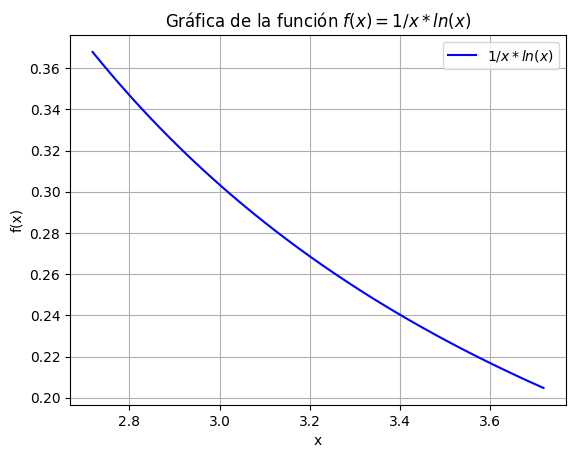

In [15]:
#x = sp.symbols('x')
x = np.linspace(np.exp(1), 1+np.exp(1), 100)
f = lambda x: 1/(x*np.log(x))

plt.plot(x, f(x), 'b-', label='$1/x*ln(x)$')
plt.title('Gráfica de la función $f(x) = 1/x*ln(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot()

Analizando la integral cuando se da el valor de x:

In [16]:
integraL_simpson = simpson(f(x), x=x)
print(f'Integral por simpson: {integraL_simpson}')

integral_trapecio = trapezoid(f(x), x)
print(f'Integral por trapecio: {integral_trapecio}')

Integral por simpson: 0.2725138804920379
Integral por trapecio: 0.2725153570094439


Analizando la integral con el valor del $dx$ (o $h$):

In [17]:
integral_simpson = simpson(f(x), dx=1)
print(f'Integral por simpson: {integraL_simpson}')

integral_trapecio = trapezoid(f(x), dx=0.01)
print(f'Integral por trapecio: {integral_trapecio}')

Integral por simpson: 0.2725138804920379
Integral por trapecio: 0.2697902034393494


In [18]:
Simpson = np.zeros(100)
trapecio = np.zeros(100)
iterador = np.zeros(100)
for i in range(100):
    x = np.linspace(np.exp(1), 1+np.exp(1), i+2)
    iterador[i] = i+2
    Simpson[i] = simpson(f(x),x=x)
    trapecio[i] = trapezoid(f(x), x)

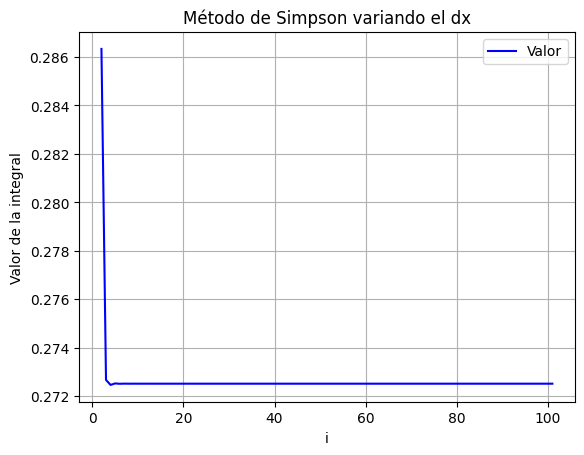

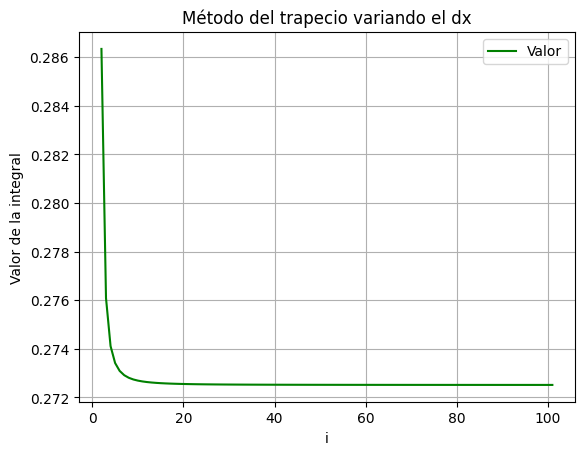

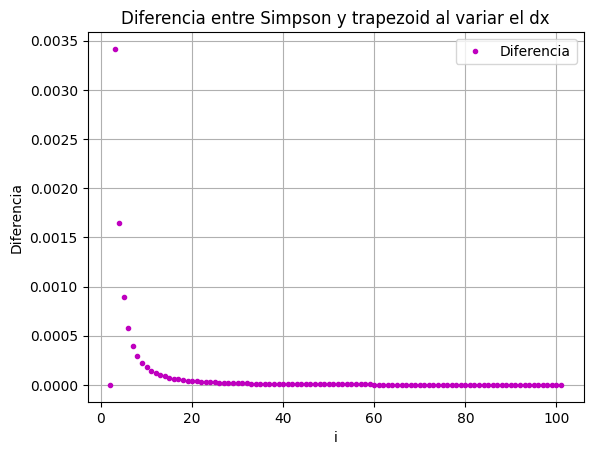

In [19]:
plt.plot(iterador, Simpson, 'b-', label=f'Valor')
plt.title('Método de Simpson variando el dx')
plt.legend()
plt.xlabel('i')
plt.ylabel('Valor de la integral')
plt.grid()
plt.show()

plt.plot(iterador, trapecio, 'g-', label=f'Valor')
plt.title('Método del trapecio variando el dx')
plt.legend()
plt.xlabel('i')
plt.ylabel('Valor de la integral')
plt.grid()
plt.show()

error = np.abs(trapecio-Simpson)

plt.plot(iterador, error, 'm.', label='Diferencia')
plt.title('Diferencia entre Simpson y trapezoid al variar el dx')
plt.legend()
plt.xlabel('i')
plt.ylabel('Diferencia')
plt.grid()
plt.show()

Para el cálculo de la integral, el método de Simpson 1/3 es mucho mejor en términos de exactitud y precisión que el método del trapecio:

Simpson indepedientemente de los parámetros retorna un valor igual (numéricamente hablando).

Ahora bien, trapezoid difiere en una cantidad pequeña con simpson a partir de las millonésimas. No obstante, al pasarle el tamaño de los sub-intervalos, simpson converge rápidamente con un $dx$ alto, del orden de las décimas, mientras que trapezoid lo hace con un $dx$ más pequeño, del orden de las centésimas.

# 3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





## Cuadratura Gaussiana en $[-1,1]$:

In [45]:
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)
    #print(x,w)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral

In [29]:
f = lambda x: np.cos(x)
gauss_quad_standard(f,8)

np.float64(1.682941969615793)

# Cuadratura Gaussiana generalizada para $[a,b]$:

In [30]:
def gauss_cuad_gen(f, a, b, n):
    '''Esta función calcula el valor de una integral definida e un intervalo [a,b].
    funcion: La función a integrar respecto a la variable elegida, ejemplo: x.
    a: Límite inferior.
    b: Límite superior.
    n: Número de puntos para la cuadratura.
    '''
    x, w = roots_legendre(n)
    #print(x,w)

    integral = ((b-a)/2)*np.sum(w*f(((b-a)/2)*x + (b+a)/2))
    return integral

Probando con la función $cos(x)$:

In [125]:
f = lambda x: np.cos(x)
resultado = gauss_cuad_gen(f, 0, np.pi/2, 10)
print(resultado)

1.0000000000000002


Probando con la función $e^{x}$:

In [126]:
g = lambda u: np.exp(u)
resultado = gauss_cuad_gen(g,0,1,10)
print(resultado)

1.718281828459045


### Calculando la integral del punto 2:

In [32]:
m = lambda x: 1/(x*np.log(x))
integral_2 = gauss_cuad_gen(m, np.e, 1+np.e, 4)
print('El valor de la integral del punto dos con cuadratura estándar fue:')
print(integral_2)

El valor de la integral del punto dos con cuadratura estándar fue:
0.27251386118132964


# 4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [33]:
from scipy.optimize import newton

In [34]:
x = sp.Symbol('x')

P3 = sp.legendre(3, x)
P3_l = sp.lambdify(x, P3)
P3_prima = sp.diff(P3)
P3_primal = sp.lambdify(x, P3_prima)

P4 = sp.legendre(4, x)
P4_l = sp.lambdify(x, P4)
P4_prima = sp.diff(P4)
P4_primal = sp.lambdify(x, P4_prima)

### Raíces del polinomio de grado 3:

r1 = -0.7745966692414834
r2 = 0.0
r3 = 0.7745966692414834


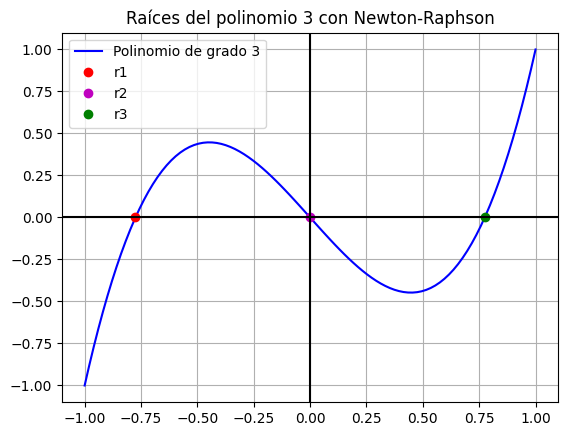

In [35]:
r1 = newton(P3_l, -0.8, P3_primal)
r2 = newton(P3_l, 0, P3_primal)
r3 = newton(P3_l, 0.8, P3_primal)

print(f'r1 = {r1}')
print(f'r2 = {r2}')
print(f'r3 = {r3}')

u = np.linspace(-1,1,100)

plt.plot(u, P3_l(u), 'b-', label='Polinomio de grado 3')
plt.plot(r1, 0, 'ro', label='r1')
plt.plot(r2, 0, 'mo', label='r2')
plt.plot(r3, 0, 'go', label='r3')
plt.title('Raíces del polinomio 3 con Newton-Raphson')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

r1 = -0.7745966692414834
r2 = 0.0
r3 = 0.7745966692414834


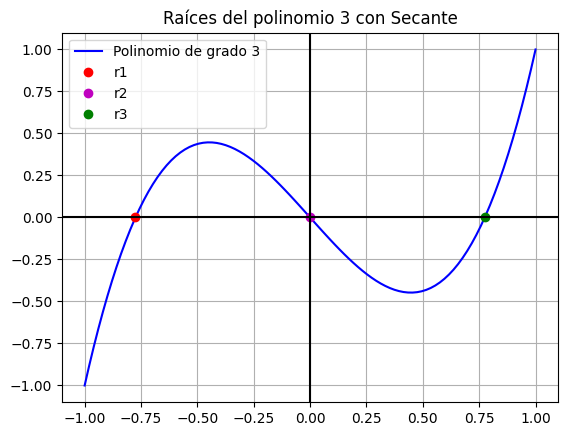

In [36]:
r1 = newton(P3_l, -0.8)
r2 = newton(P3_l, 0)
r3 = newton(P3_l, 0.8)

print(f'r1 = {r1}')
print(f'r2 = {r2}')
print(f'r3 = {r3}')

plt.plot(u, P3_l(u), 'b-', label='Polinomio de grado 3')
plt.plot(r1, 0, 'ro', label='r1')
plt.plot(r2, 0, 'mo', label='r2')
plt.plot(r3, 0, 'go', label='r3')
plt.title('Raíces del polinomio 3 con Secante')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

In [37]:
raices_3 = np.array([r1, r2, r3])

Cálculo de los pesos:

In [38]:
def pesos(diff_polinomio, x):
    return 2/((1-x**2)*(diff_polinomio(x))**2)

In [39]:
pesos3 = pesos(P3_primal, raices_3)
pesos3

array([0.55555556, 0.88888889, 0.55555556])

In [40]:
x, w = roots_legendre(3)
print(x, w)

[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]


### Raíces del polinomio de grado 4:

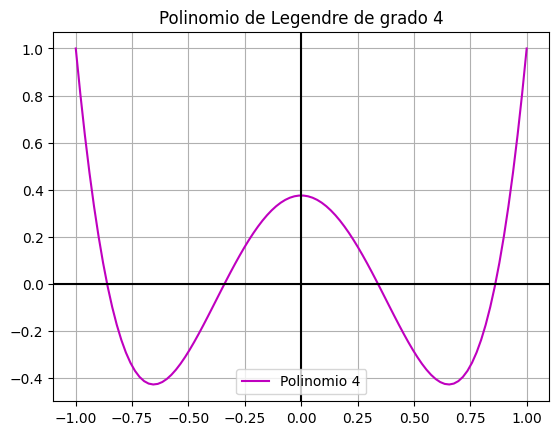

In [41]:
plt.plot(u, P4_l(u), 'm-', label='Polinomio 4')
plt.title('Polinomio de Legendre de grado 4')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

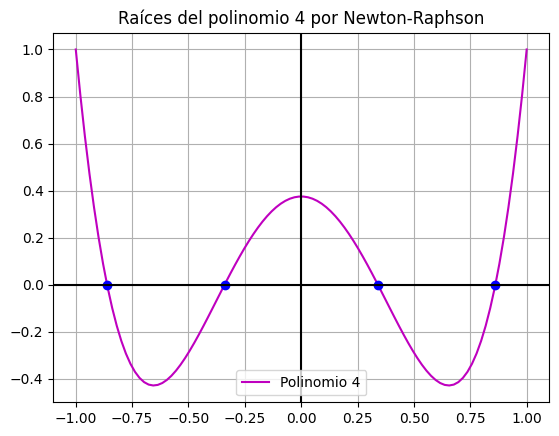

In [42]:
r1 = newton(P4_l, -0.75, P4_primal)
r2 = newton(P4_l, -0.25, P4_primal)
r3 = newton(P4_l, 0.25, P4_primal)
r4 = newton(P4_l, 0.75, P4_primal)

plt.plot(u, P4_l(u), 'm-', label='Polinomio 4')
plt.plot(r1, 0, 'bo')
plt.plot(r2, 0, 'bo')
plt.plot(r3, 0, 'bo')
plt.plot(r4, 0, 'bo')
plt.title('Raíces del polinomio 4 por Newton-Raphson')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

[-0.86113631 -0.33998104  0.33998104  0.86113631]


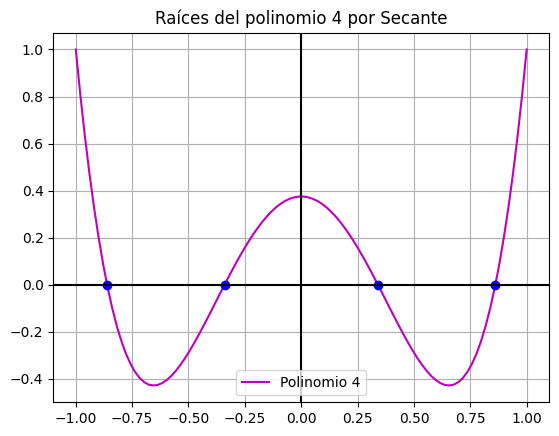

In [43]:
r1 = newton(P4_l, -0.75)
r2 = newton(P4_l, -0.25)
r3 = newton(P4_l, 0.25)
r4 = newton(P4_l, 0.75)

raices_4 = np.array([r1,r2,r3,r4])
print(raices_4)

plt.plot(u, P4_l(u), 'm-', label='Polinomio 4')
plt.plot(r1, 0, 'bo')
plt.plot(r2, 0, 'bo')
plt.plot(r3, 0, 'bo')
plt.plot(r4, 0, 'bo')
plt.title('Raíces del polinomio 4 por Secante')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

Cálculo de los pesos:

In [44]:
pesos4 = pesos(P4_primal, raices_4)
print('Cálculo de los pesos:')
print(pesos4)

x, w = roots_legendre(4)
print('Con la función de Scipy:')
print(w)

Cálculo de los pesos:
[0.34785485 0.65214515 0.65214515 0.34785485]
Con la función de Scipy:
[0.34785485 0.65214515 0.65214515 0.34785485]
